<a href="https://colab.research.google.com/github/zeyadhossam/GUC-Portel/blob/master/Copy_of_Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 2 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Zeyad Hossam

ID: 43-10793

Tutorial: T09

---

Name: Peter Gamal

ID: 43-16762

Tutorial: T03



---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
plt.style.use("seaborn")
sns.set_style('whitegrid')

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')


In [11]:
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [12]:
df[(df.genres == '[]')]

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
3,1,[],0.651417,0.529093,232880.89025,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7


In [13]:
i=df[(df.genres == '[]')].index
df.drop(i,inplace=True)
df.reset_index(drop=True, inplace=True)
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2968,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2969,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2970,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [14]:
df.isnull().sum() / df.count() * 100

mode                0.0
genres              0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
dtype: float64

In [15]:
new_df=df[['mode', 'acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','tempo','valence','popularity','key']].copy()
new_df

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,0.047000,133.444000,0.975000,48.000000,7
3,1,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,0.082851,112.110362,0.448249,45.820071,7
4,1,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,0.046517,127.885750,0.307325,43.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,0.061088,125.494919,0.596155,33.778943,9
2968,0,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,0.081300,119.038000,0.845000,58.000000,7
2969,1,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,0.038778,101.965222,0.824111,46.666667,5
2970,0,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,0.348667,91.278000,0.739000,0.000000,7


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
>>> X_train_minmax = min_max_scaler.fit_transform(X_train)
>>> X_train_minmax   

In [16]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(new_df)

scaled_data

array([[ 0.44757469,  1.80834218, -2.48432022, ..., -1.92725355,
        -0.72213868,  0.01828198],
       [ 0.44757469,  0.2928222 , -1.57868449, ..., -1.34273793,
         0.75093152, -0.2786254 ],
       [ 0.44757469,  1.12859655,  1.16023582, ...,  2.38955698,
         0.48219574,  0.31518936],
       ...,
       [ 0.44757469, -0.43129108,  1.405072  , ...,  1.64191432,
         0.40257032, -0.2786254 ],
       [-2.23426397,  1.85108692,  1.1182007 , ...,  1.22019541,
        -2.38431924,  0.31518936],
       [ 0.44757469,  0.06218354,  0.61206723, ...,  1.56477877,
        -0.57710667,  0.31518936]])

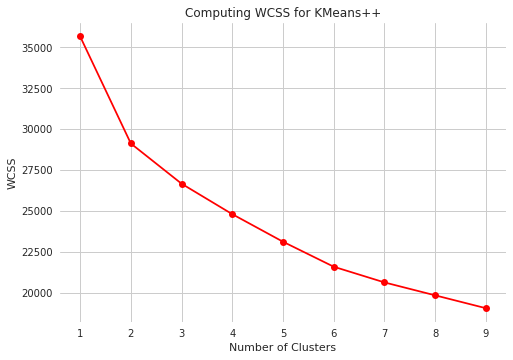

In [17]:
from sklearn.cluster import KMeans

wcss = []
for k in range( 1, 10 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(scaled_data)
    wcss.append( kmeans.inertia_ )
    
plt.plot(range(1, 10), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:

km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(new_df
)

# Get the cluster labels for the fitted data
labels = km.labels_
labels

array([0, 2, 0, ..., 1, 0, 0], dtype=int32)

In [21]:
df['cluster'] = labels

# Since we only have two columns, we can easily plot/represent the clusters on a single scatterplot
# If we had more columns, we can consider using seaborn's pairplot (to a pair-wise scatterplot of every column)
# Or a box/violin plot, to look at the data distribution of each cluster with respect within each column/feature
plt.figure(figsize=(20,10))
sns.scatterplot(x='Income', y='Score', hue='cluster', data=new_df, palette=sns.color_palette('hls', 5));

# Since we're dealing with just two columns, we'll also add the centroids
# to the plot to visually demonstrate the algorithm's cluster centers
centroids = km.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], label='centroid', color='black', alpha=0.5, s=100);

ValueError: ignored

<Figure size 1440x720 with 0 Axes>